In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Для визуализации, если признаков много
import seaborn as sns

In [2]:
# Чтение файла
lollipops = pd.read_csv('Леденцы.dat', sep=';')

# Небольшой разведочный анализ
print("Первые 5 строк датафрейма:")
display(lollipops.head())
print(f"\nРазмер датафрейма: {lollipops.shape}")
print("\nОсновная информация:")
lollipops.info()
print("\nОписательная статистика:")
display(lollipops.describe())
print("\nПропущенные значения:", lollipops.isnull().sum(), sep='\n')

Первые 5 строк датафрейма:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3



Размер датафрейма: (338, 11)

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB

Описательная статистика:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



Пропущенные значения:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64


In [4]:
# Стандартизация данных
scaler = StandardScaler()
lollipops_scaled = scaler.fit_transform(lollipops)

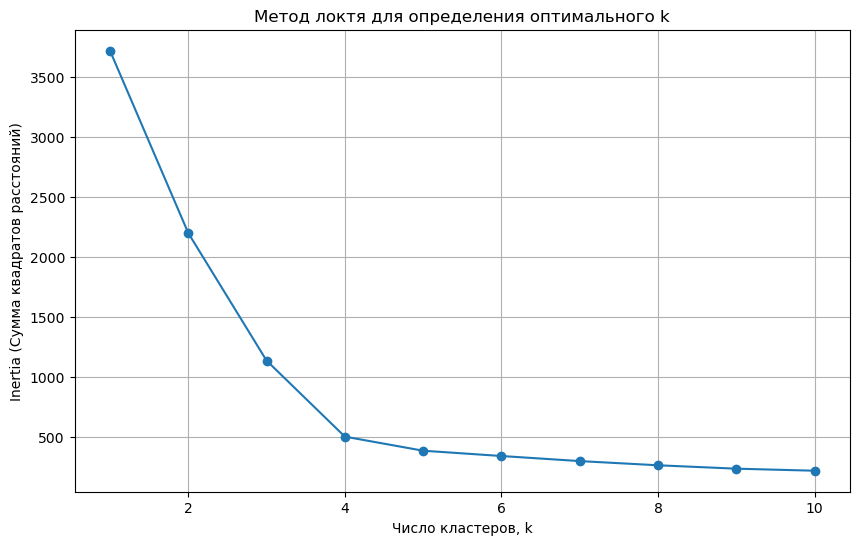

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(lollipops_scaled)
    inertia.append(kmeans.inertia_)  # inertia_ - сумма квадратов расстояний до центров кластеров

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для определения оптимального k')
plt.xlabel('Число кластеров, k')
plt.ylabel('Inertia (Сумма квадратов расстояний)')
plt.grid(True)
plt.show()

Как видно из графика "локоть" = 4  — значение, после которого падение инерции замедляется. Значит стоит выбрать K = 4

In [14]:
# Выполним кластеризацию
k = 4  # Это мы только что выбрали из графика каменистой осыпи
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(lollipops_scaled)

# Добавим метки кластеров в исходный датафрейм
lollipops['Cluster'] = clusters

# Посмотрим на распределение по кластерам
print(lollipops['Cluster'].value_counts())

Cluster
2    110
0    108
1     61
3     59
Name: count, dtype: int64


Центры кластеров (средние значения по каждому признаку):
            0         1         2         3
V1   2.824074  3.000000  4.845455  3.000000
V2   2.833333  3.000000  4.800000  2.966102
V3   2.768519  3.000000  4.836364  2.966102
V4   2.620370  3.000000  4.681818  2.915254
V5   2.611111  4.852459  3.036364  2.915254
V6   2.583333  4.852459  3.036364  2.949153
V7   2.750000  3.000000  3.000000  4.915254
V8   2.916667  2.918033  2.990909  4.915254
V9   4.953704  2.754098  3.072727  3.000000
V10  4.814815  2.754098  3.045455  3.000000
V11  4.861111  2.754098  3.045455  3.000000


<Figure size 1200x600 with 0 Axes>

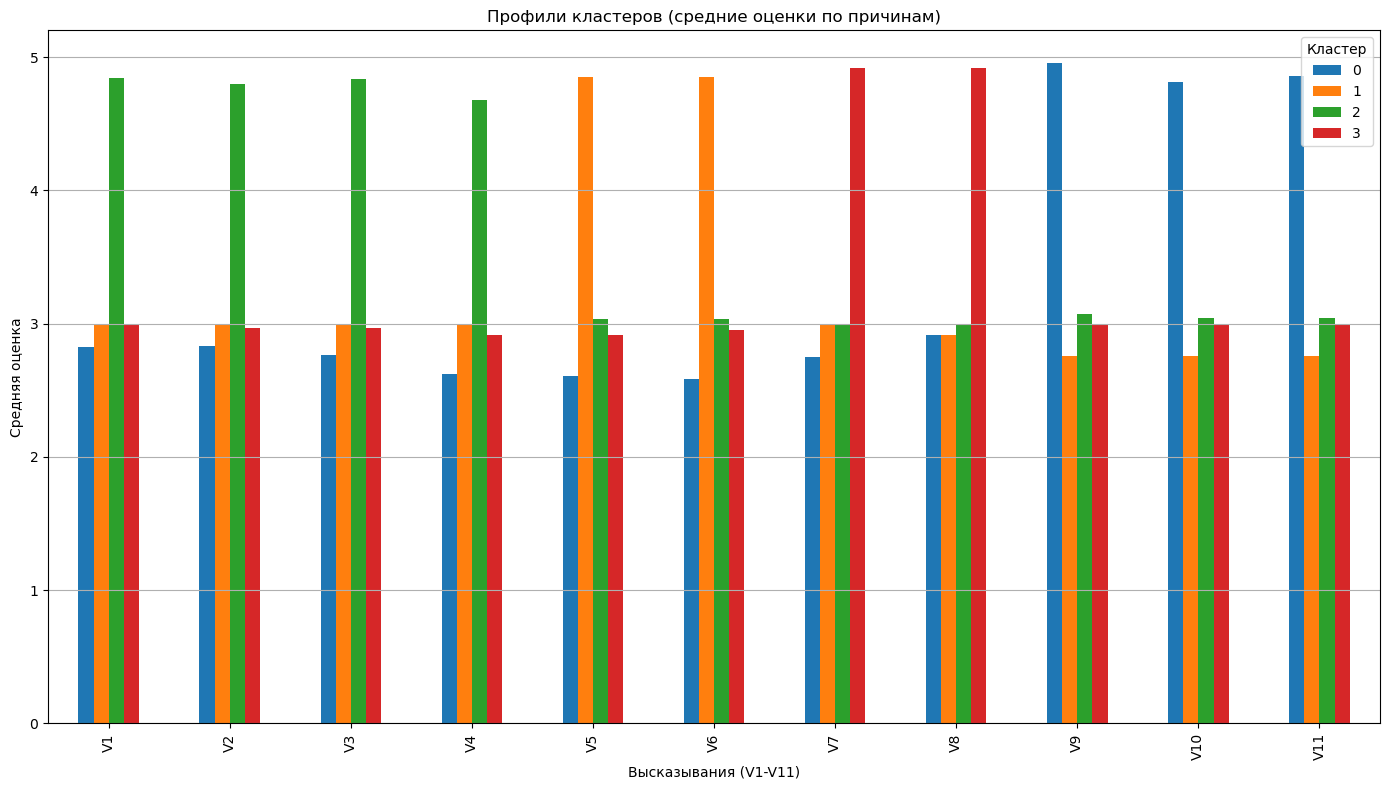

In [19]:
# Получим центры кластеров в исходном масштабе
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Создадим DataFrame для наглядности
centers_df = pd.DataFrame(centers, columns=lollipops.columns[:-1])  # Исключаем столбец 'Cluster'

print("Центры кластеров (средние значения по каждому признаку):")
print(centers_df.T)

# Визуализируем центры кластеров
plt.figure(figsize=(12, 6))
centers_df.T.plot(kind='bar', figsize=(14, 8))  # Транспонируем для удобства
plt.title('Профили кластеров (средние оценки по причинам)')
plt.xlabel('Высказывания (V1-V11)')
plt.ylabel('Средняя оценка')
plt.legend(title='Кластер')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Из графика явно видна группировка высказываний по кластерам:  
Кластер 0: V9-V11 "Я потребляю леденцы по состоянию здоровья"  
Кластер 1: V5-V6 "Я потребляю леденцы, потому что хочу сладкое"  
Кластер 2: V1-V4 "Я потребляю леденцы для свежести дыхания и уверенности"  
Кластер 3: V7-V8 "Я потребляю леденцы для концентрации"  